In [46]:
# #importing all important package..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#load data into pandas dataframe..
df = pd.read_csv(r"C:\Users\jki\Downloads\UK Rteail Store.csv",encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [48]:
# check on the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
#Country with high count must be taken for testing purpose... can we divide based on demographic or similar taste

df.Country.value_counts().head(5)

df = df[df.Country == 'United Kingdom']

<Axes: >

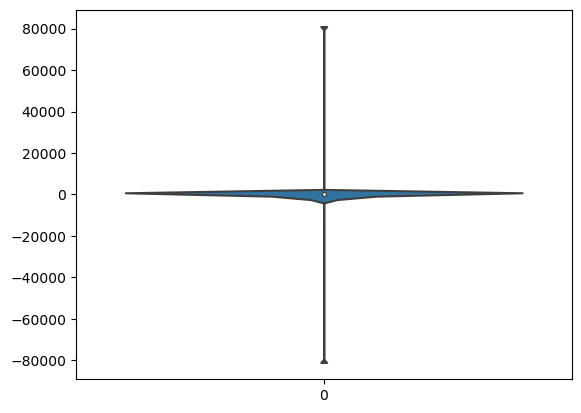

In [8]:
#checking distribution of quantity..

sns.violinplot(df.Quantity)


In [50]:
df.Quantity.describe()


count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [51]:
# Quantity can not be negative so remvoe negative  values
df = df[df['Quantity']>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<Axes: >

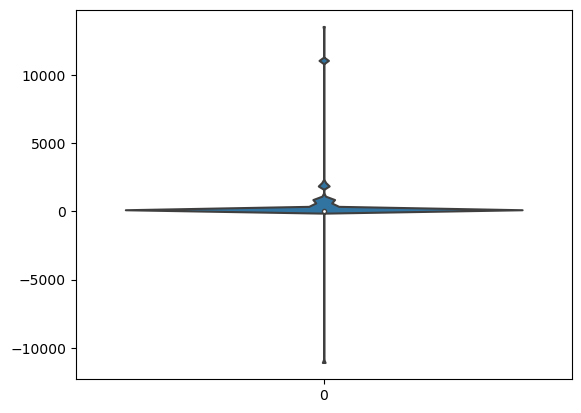

In [14]:
# checking distributio of unit price ..
sns.violinplot(df.UnitPrice)

In [17]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [26]:
# checking ofr null values in all columns in dataset
print(df.isna().sum())


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64


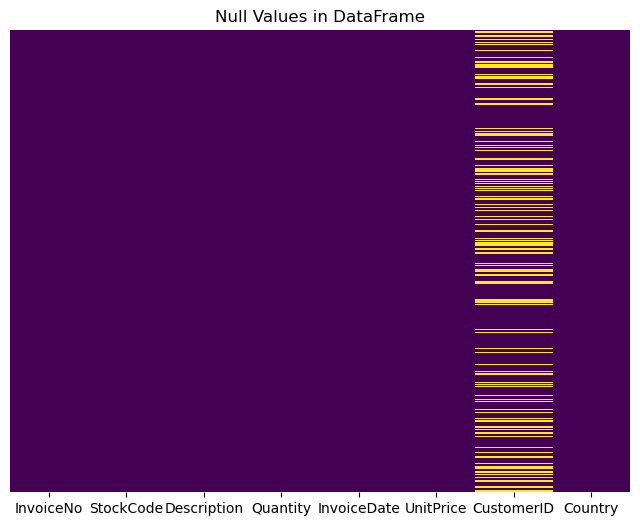

In [52]:
# Creating a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Null Values in DataFrame')
plt.show()

In [53]:
# remover all null value
df = df.dropna()

In [54]:
# checking ofr null values in all columns in dataset
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [32]:
# gettting the oldest cuurent date
df['InvoiceDate'].min()

'1/10/2011 10:32'

In [33]:
# gettting the oldest cuurent date
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [55]:
# Using latest date as current date
# convert the invoice date column  to determine format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# use the latest date as the currnt date
df['InvoiceDate']=df['InvoiceDate'].max()



In [56]:
# explore the date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-09 12:49:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2011-12-09 12:49:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2011-12-09 12:49:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2011-12-09 12:49:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2011-12-09 12:49:00,3.39,17850.0,United Kingdom


In [39]:
# group by customer by last date they purchased
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# group by customer and find last purchase date for each customer
recency_df =df.groupby('CustomerID')['InvoiceDate'].agg(last_purchase_date='max').reset_index()
recency_df.head()

,CustomerID,last_purchase_date
0,12346.0,2011-12-09 12:49:00
1,12747.0,2011-12-09 12:49:00
2,12748.0,2011-12-09 12:49:00
3,12749.0,2011-12-09 12:49:00
4,12820.0,2011-12-09 12:49:00


In [62]:
# calculate frequency with refrence to the latest date
# calculate recency using lamda function
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # convert purchase column to datetime format

current_date = datetime.now() # current date and time
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x : (current_date-x.max()).days)
print(df['Recency'])

0         4392
1         4392
2         4392
3         4392
4         4392
          ... 
541889    4392
541890    4392
541891    4392
541892    4392
541893    4392
Name: Recency, Length: 354345, dtype: int64


In [63]:
recency_df.head()

,CustomerID,last_purchase_date
0,12346.0,2011-12-09 12:49:00
1,12747.0,2011-12-09 12:49:00
2,12748.0,2011-12-09 12:49:00
3,12749.0,2011-12-09 12:49:00
4,12820.0,2011-12-09 12:49:00
